# import

In [819]:
# import
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

import plotly.graph_objects as go
from plotly.subplots import make_subplots

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline
# 마이너스 부호 떄문에 한글이 깨질 수가 있어 설정
plt.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')


In [820]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_final_6.xlsx', index_col=0)

In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    object 
 7   production_country  905 non-null    object 
 8   total_count         905 non-null    int64  
 9   total_rate          905 non-null    float64
 10  watchlist           905 non-null    int64  
 11  popularity          905 non-null    int64  
 12  user_review         905 non-null    int64  
 13  critic_review       905 non-null    int64  
 14  production          821 non-null    object 
 15  distributor         897 non-null    object 
 16  season_1     

In [822]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [823]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [824]:
df['season_1'][0]

{'S1.E1': [8.2, 16000, 'Fri, Sep 17, 2021'],
 'S1.E2': [7.5, 14000, 'Fri, Sep 17, 2021'],
 'S1.E3': [8.0, 14000, 'Fri, Sep 17, 2021'],
 'S1.E4': [8.4, 14000, 'Fri, Sep 17, 2021'],
 'S1.E5': [7.6, 13000, 'Fri, Sep 17, 2021'],
 'S1.E6': [9.2, 23000, 'Fri, Sep 17, 2021'],
 'S1.E7': [7.9, 13000, 'Fri, Sep 17, 2021'],
 'S1.E8': [7.8, 13000, 'Fri, Sep 17, 2021'],
 'S1.E9': [7.5, 14000, 'Fri, Sep 17, 2021']}

In [825]:
# 연령 제한 숫자로 변환
df['age_rating'] = df['age_rating'].replace('ALL', 0).astype(int)

## 범위가 큰 몇 컬럼들 log변환하여 최대한 정규화

In [826]:
# Subplots 생성
fig = make_subplots(rows=1, cols=1)

# 첫 번째 히스토그램 추가
fig.add_trace(go.Histogram(
    x=df['total_rate'],
    name='Total_rate (전체 평점)'
), row=1, col=1)

# 레이아웃 업데이트
fig.update_layout(
    title_text='Total_rate (전체 평점) Histogram',
    showlegend=False
)

# 그래프 출력
fig.show()

In [827]:
# Subplots 생성
fig = make_subplots(rows=1, cols=6)

# 첫 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['user_review'],
    name='User Review(유저 리뷰 수)'
), row=1, col=1)

# 두 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['total_count'],
    name='Total Count(평점 매긴 인원 수)'
), row=1, col=2)

# 세 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['watchlist'],
    name='Watchlist(Watchlist 수)'
), row=1, col=3)

# 네 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['critic_review'],
    name='Critic Review(비평가 리뷰 수)'
), row=1, col=4)

# 다섯 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['nominations'],
    name='Nominations(후보에 오른 수)'
), row=1, col=5)

# 여섯 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['wins'],
    name='Wins(수상이력 수)'
), row=1, col=6)

# 레이아웃 업데이트
fig.update_layout(
    title_text='User Review, Total Count, Watchlist, Critic Review, and Nominations Histograms',
    showlegend=False
)

# 그래프 출력
fig.show()

In [828]:
# 로그 변환 적용 

df['user_review'] = np.log1p(df['user_review'])  # log(1+x) 변환 사용
df['total_count'] = np.log1p(df['total_count'])
df['watchlist'] = np.log1p(df['watchlist'])
df['critic_review'] = np.log1p(df['critic_review'])
df['wins'] = np.log1p(df['wins'])
df['nominations'] = np.log1p(df['nominations'])

In [829]:
# Subplots 생성
fig = make_subplots(rows=1, cols=6)

# 첫 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['user_review'],
    name='User Review(유저 리뷰 수)'
), row=1, col=1)

# 두 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['total_count'],
    name='Total Count(평점 매긴 인원 수)'
), row=1, col=2)

# 세 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['watchlist'],
    name='Watchlist(Watchlist 수)'
), row=1, col=3)

# 네 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['critic_review'],
    name='Critic Review(비평가 리뷰 수)'
), row=1, col=4)

# 다섯 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['nominations'],
    name='Nominations(후보에 오른 수)'
), row=1, col=5)

# 여섯 번째 히스토그램
fig.add_trace(go.Histogram(
    x=df['wins'],
    name='Wins(수상이력 수)'
), row=1, col=6)

# 레이아웃 업데이트
fig.update_layout(
    title_text='User Review, Total Count, Watchlist, Critic Review, and Nominations Histograms',
    showlegend=False
)

# 그래프 출력
fig.show()

- log변환으로 큰 값의 영향을 줄이고, 데이터의 분포를 더 정규분포에 가깝게 만듬

# PCA

## 드라마의 전반적인 흥행과 관련된 feature들을 PCA로 차원축소

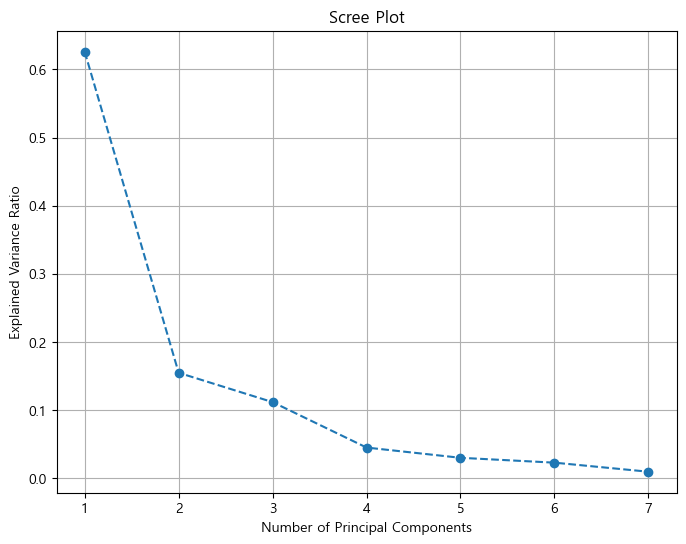

In [830]:
# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()

metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
# metrics_df['popularity'] = df['popularity'] 매일바뀌는수치이기에뺌
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']
metrics_df['wins'] = df['wins']
metrics_df['nominations'] = df['nominations']

# 데이터 표준화
scaler = StandardScaler()
metrics_df_scaled = scaler.fit_transform(metrics_df)

# PCA 수행
pca = PCA()
pca.fit(metrics_df_scaled)

# Scree Plot 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [831]:
# NumPy 배열을 데이터프레임으로 변환
metrics_df_scaled_df = pd.DataFrame(metrics_df_scaled, columns=metrics_df.columns)

In [832]:
# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:")
for i, var_ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {var_ratio:.4f}")

Explained variance ratio for each principal component:
Principal Component 1: 0.6261
Principal Component 2: 0.1548
Principal Component 3: 0.1117
Principal Component 4: 0.0450
Principal Component 5: 0.0300
Principal Component 6: 0.0229
Principal Component 7: 0.0095


- PC1부터 PC3까지 주성분 사용

PC1과 PC2, PC3는 합쳐서 약 89.26%의 분산을 설명하므로, 데이터의 80% 이상을 설명할 수 있습니다.
데이터의 주요 패턴을 이해하기에 충분할 수 있습니다.

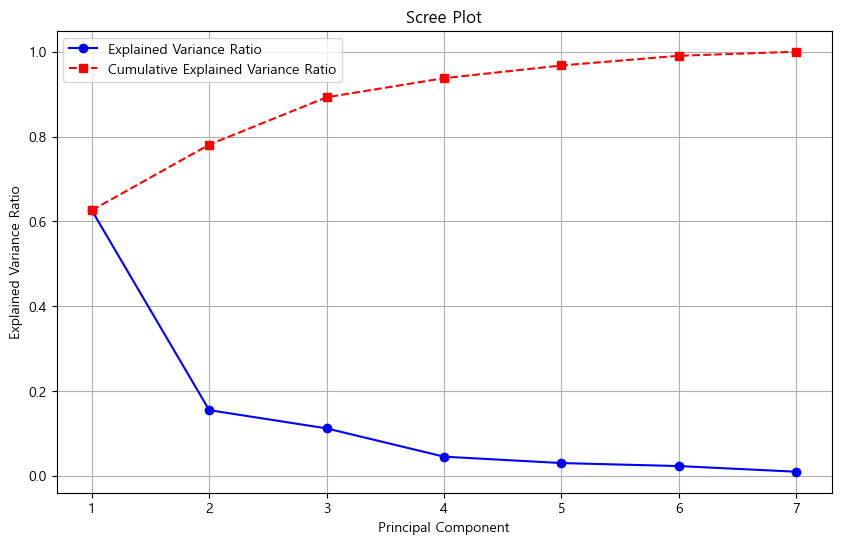

In [833]:
# 주성분 번호
components = range(1, len(explained_variance_ratio) + 1)

# 누적 설명된 분산 비율 계산
cumulative_variance_ratio = [sum(explained_variance_ratio[:i+1]) for i in range(len(explained_variance_ratio))]

# 팔꿈치 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(components, explained_variance_ratio, marker='o', linestyle='-', color='b', label='Explained Variance Ratio')
plt.plot(components, cumulative_variance_ratio, marker='s', linestyle='--', color='r', label='Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(components)
plt.legend()
plt.grid(True)
plt.show()

In [834]:
# PCA 적용 (n_components=3)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(metrics_df_scaled_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_

# 각 주성분에 대한 가중치 딕셔너리
weights_pc1 = {metrics_df_scaled_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df_scaled_df.columns))}
weights_pc2 = {metrics_df_scaled_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df_scaled_df.columns))}
weights_pc3 = {metrics_df_scaled_df.columns[i]: pca_weights[2, i] for i in range(len(metrics_df_scaled_df.columns))}

print("Weights for PC1:")
print(weights_pc1)

print("Weights for PC2:")
print(weights_pc2)

print("Weights for PC3:")
print(weights_pc3)

Weights for PC1:
{'watchlist': 0.39885250508577597, 'total_rate': 0.23932498627938426, 'total_count': 0.45174084471893144, 'user_review': 0.4189310984287094, 'critic_review': 0.3638932906430886, 'wins': 0.35043210931108126, 'nominations': 0.3858058888869458}
Weights for PC2:
{'watchlist': -0.169985238220215, 'total_rate': 0.6080054979474824, 'total_count': -0.16489814703196648, 'user_review': -0.3064941544719491, 'critic_review': -0.4223928018889752, 'wins': 0.45214519141488385, 'nominations': 0.3121751342204857}
Weights for PC3:
{'watchlist': -0.4013104035286919, 'total_rate': -0.6118564082873622, 'total_count': -0.1281466227992796, 'user_review': -0.09179172461790046, 'critic_review': 0.2055702216182669, 'wins': 0.4503919915837761, 'nominations': 0.4411602383660079}


PC1: PC1의 변수들은 모두 양의 가중치를 가지고 있으며, 이는 이 주성분이 전체적인 영화의 인기와 평가 점수를 주로 설명. 따라서 PC1은 영화의 전반적인 인기와 평가에 대한 요소를 포괄하는 주성분.

PC2: total_rate, user_review, critic_review의 평가와 관련된 요소들이 어떻게 반대 방향으로 변동하는지를 중심으로 설명. 예를 들어, 평가 점수가 높을수록 사용자와 비평가들의 리뷰 수는 낮아질 수 있음을 시사. 따라서 PC2는 영화 평가 점수와 관련된 상반된 패턴을 설명하는 주성분.

PC3: 주로 total_rate와 user_review 등 평가 점수와 관련된 변수들이 음의 방향으로 기여. 즉, 평가 점수와 관련된 요소들이 낮을수록 이 주성분의 값은 상대적으로 높아집니다. 반면, critic_review, wins, nominations 등의 변수들은 양의 방향으로 기여하고 있습니다. 이는 평가 점수와는 별개로, 영화의 입상 경력이나 평론가들의 리뷰 등이 높을수록 PC3의 값이 더 높아진다는 것을 의미.
예를 들어, 평가 점수가 낮더라도 입상 경력이나 평론가 리뷰가 높으면 PC3의 값이 올라갈 수 있다는 것을 나타냄.

In [835]:
# 주성분을 데이터프레임으로 변환
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# 원래 데이터프레임에 주성분 추가
df['PC1'] = pca_df['PC1']
df['PC2'] = pca_df['PC2']
df['PC3'] = pca_df['PC3']

# 결과 확인
print(df.head())

                  korean_title      english_title  year  total_season_num  \
Unnamed: 0                                                                  
0                       오징어 게임         Squid Game  2021                 1   
1                     12인의 심판자         The Twelve  2019                 1   
2                       희생자 게임  The Victims' Game  2020                 1   
3           스위트 투스: 사슴뿔을 가진 소년        Sweet Tooth  2021                 2   
4                         스위트홈         Sweet Home  2020                 2   

            runtime                      genre  age_rating production_country  \
Unnamed: 0                                                                      
0                55               액션, 드라마, 스릴러          19               대한민국   
1                54                   드라마, 스릴러          19                벨기에   
2                60               드라마, 범죄, 스릴러          19                 대만   
3                52           SF, 드라마, 판타지, 액션         

In [836]:
# 각 주성분이 원래 변수들과 어떤 상관관계를 가지는지 확인
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])], index=metrics_df.columns)
print('Loadings:\n', loadings)

Loadings:
                     PC1       PC2       PC3
watchlist      0.398853 -0.169985 -0.401310
total_rate     0.239325  0.608005 -0.611856
total_count    0.451741 -0.164898 -0.128147
user_review    0.418931 -0.306494 -0.091792
critic_review  0.363893 -0.422393  0.205570
wins           0.350432  0.452145  0.450392
nominations    0.385806  0.312175  0.441160


In [837]:
# 각 주성분의 가중치 설정 (설명된 분산 비율 사용)
weights = explained_variance_ratio[:3] / explained_variance_ratio[:3].sum()

# 각 주성분에 대한 가중치 출력
print(f"Weights for PC1, PC2, PC3: {weights}")

# 흥행지표 계산 함수 수정
def calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights):
    # 각 주성분의 흥행지표 계산
    metric_pc1 = sum(weights_pc1[col] * row[col] for col in metrics_df_scaled_df.columns)
    metric_pc2 = sum(weights_pc2[col] * row[col] for col in metrics_df_scaled_df.columns)
    metric_pc3 = sum(weights_pc3[col] * row[col] for col in metrics_df_scaled_df.columns)

    # 종합 흥행지표 계산
    total_metric = weights[0] * metric_pc1 + weights[1] * metric_pc2 + weights[2] * metric_pc3
    return total_metric

# 종합 흥행지표 계산 및 결과 출력
df['PCA'] = metrics_df_scaled_df.apply(lambda row: calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights), axis=1)

# 결과 출력
print(df[['korean_title', 'PCA']])

Weights for PC1, PC2, PC3: [0.70141676 0.17341536 0.12516788]
                       korean_title       PCA
Unnamed: 0                                   
0                            오징어 게임  4.052857
1                          12인의 심판자  0.868472
2                            희생자 게임 -0.413941
3                스위트 투스: 사슴뿔을 가진 소년  2.595940
4                              스위트홈  0.898617
...                             ...       ...
900                             레일라 -0.799565
901                     100만 엔의 여인들 -1.368528
902                         킬러 코미디언 -1.045870
903                              달러 -2.178660
904         엘리트들, 못다 한 이야기: 나디아 구스만 -1.633638

[905 rows x 2 columns]


- 가중치 PC1* 0.84179977 + PC2* 0.15820023 = success_metric

               korean_title       PCA
Unnamed: 0                           
17                  브레이킹 배드  5.643463
24                  기묘한 이야기  5.420928
7                     워킹 데드  4.999856
47                    더 크라운  4.930854
42                  베터 콜 사울  4.878100
54                      덱스터  4.594199
59                하우스 오브 카드  4.341436
46                    블랙 미러  4.257262
19                     바이킹스  4.250067
43                    퀸스 갬빗  4.200176
28                      하우스  4.192847
33                      오자크  4.184961
0                    오징어 게임  4.052857
109           오렌지 이즈 더 뉴 블랙  4.015419
51                    종이의 집  3.978552
27                 피키 블라인더스  3.845537
25                   굿 플레이스  3.727276
9                       플래시  3.726245
14                     아웃랜더  3.663873
40                     애틀란타  3.657780
61              오티스의 비밀 상담소  3.650393
26                뱀파이어 다이어리  3.580344
49          스타트렉: 넥스트 제너레이션  3.545357
107           그들이 우리를 바라볼 때  3.504495
159         

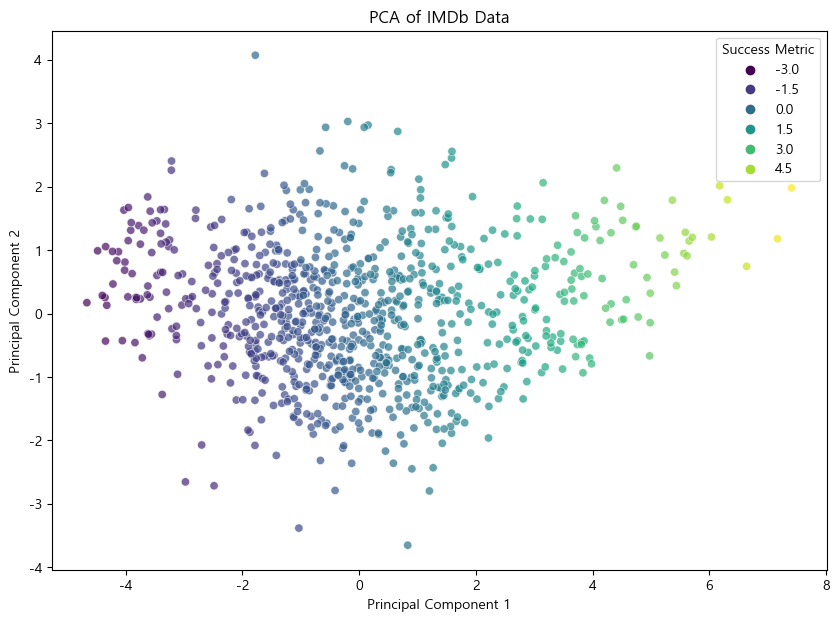

In [838]:
# PCA을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='PCA', ascending=False)

# 상위 30개 작품 출력 (korean_title 사용)
top_30 = sorted_df[['korean_title', 'PCA']].head(30)

# 결과 출력
print(top_30)

# 시각화
plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(data=df, x='PC1', y='PC2', hue='PCA', palette='viridis', alpha=0.7)

# # 각 점에 korean_title 표시
# for line in range(0, df.shape[0]):
#     scatterplot.text(df.PC1[line], df.PC2[line], df.korean_title[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()

In [839]:
# PCA을 기준으로 오름차순 정렬
sorted_df = df.sort_values(by='PCA', ascending=True)

# 하위 30개 작품 출력 (korean_title 사용)
top_30 = sorted_df[['korean_title', 'PCA']].head(30)

# 결과 출력
print(top_30)

                          korean_title       PCA
Unnamed: 0                                      
823             사랑, 인생, 그리고 그 사이의 모든 것 -3.018554
800                             새비지 리듬 -2.844723
801                   겟 이븐: 우리는 치어 스쿼드 -2.843787
826                               #노필터 -2.837045
364                           인생은 오답노트 -2.819400
227                         앗! 크리스마스라니 -2.811897
400                             마이 런웨이 -2.742038
783                   체조 아카데미: 두 번째 기회 -2.699481
818                                케이지 -2.682527
813                               파나티코 -2.658993
773               엘리트들, 못다 한 이야기: 파트리크 -2.638808
732         엘리트들, 못다 한 이야기: 필리프 카예 펠리페 -2.609800
790                               괴기특급 -2.578932
756                            징크스의 연인 -2.562025
686                             여름의 비밀 -2.547363
726                    오랫동안 당신을 기다렸습니다 -2.543162
617                            페르마의 요리 -2.506880
325                           청담국제고등학교 -2.497032
424            엘리트들,

In [840]:
metrics_df_scaled_df['PC1'] = pca_df['PC1']
metrics_df_scaled_df['PC2'] = pca_df['PC2']
metrics_df_scaled_df['PC3'] = pca_df['PC3']
metrics_df_scaled_df['PCA'] = df['PCA']

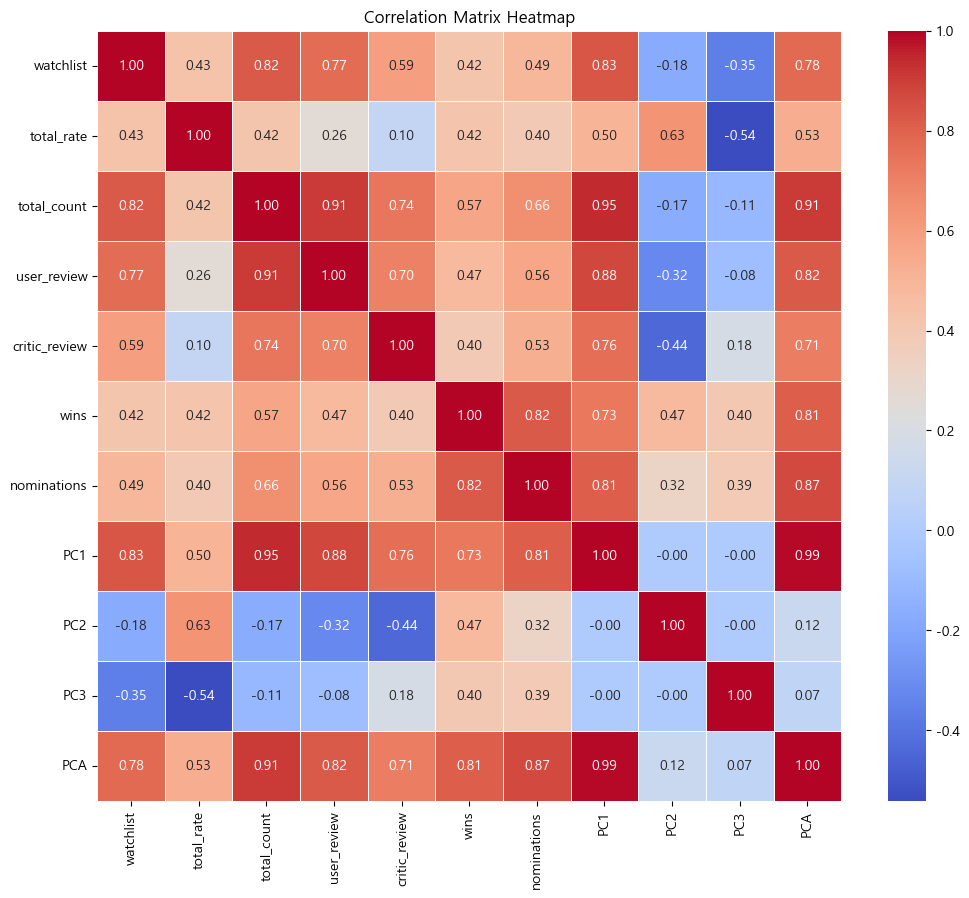

In [841]:
# 상관관계 분석
correlation_matrix =  metrics_df_scaled_df.corr()
# Heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [842]:
# Subplots 생성
fig = make_subplots(rows=1, cols=1)

# 첫 번째 히스토그램 추가
fig.add_trace(go.Histogram(
    x=df['PCA'],
    name='PCA (드라마의 전반적인 흥행)'
), row=1, col=1)

# 레이아웃 업데이트
fig.update_layout(
    title_text='PCA (드라마의 전반적인 흥행)',
    showlegend=False
)

# 그래프 출력
fig.show()

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    int32  
 7   production_country  905 non-null    object 
 8   total_count         905 non-null    float64
 9   total_rate          905 non-null    float64
 10  watchlist           905 non-null    float64
 11  popularity          905 non-null    int64  
 12  user_review         905 non-null    float64
 13  critic_review       905 non-null    float64
 14  production          821 non-null    object 
 15  distributor         897 non-null    object 
 16  season_1     

## runtime 인코딩과 시즌 내 term계산

In [844]:
'''
# 엑셀 파일을 읽어옵니다.
imdb_final_6 = pd.read_excel('../data/file/imdb_pca.xlsx', index_col=0)
'''

"\n# 엑셀 파일을 읽어옵니다.\nimdb_final_6 = pd.read_excel('../data/file/imdb_pca.xlsx', index_col=0)\n"

In [845]:
'''
# runtime을 카테고리로 변환하는 함수 정의
def categorize_runtime(runtime):
    if runtime <= 15:
        return '<=15'
    elif runtime <= 20:
        return '20'
    elif runtime <= 25:
        return '25'
    elif runtime <= 30:
        return '30'
    elif runtime <= 35:
        return '35'
    elif runtime <= 40:
        return '40'
    elif runtime <= 45:
        return '45'
    elif runtime <= 50:
        return '50'
    elif runtime <= 55:
        return '55'
    elif runtime <= 60:
        return '60'
    elif runtime <= 65:
        return '65'
    elif runtime < 71:
        return '70'
    else:
        return '>=71'

# apply 함수를 사용하여 카테고리화된 runtime 추가
imdb_final_6['runtime_category'] = imdb_final_6['runtime'].apply(categorize_runtime)

# 각 카테고리의 평균 runtime을 계산하여 매핑
category_mapping = imdb_final_6.groupby('runtime_category')['runtime'].mean().to_dict()

# 카테고리를 평균 값으로 매핑하여 target 인코딩 적용
imdb_final_6['runtime_encoded'] = imdb_final_6['runtime_category'].map(category_mapping)

print(imdb_final_6.head())
'''

"\n# runtime을 카테고리로 변환하는 함수 정의\ndef categorize_runtime(runtime):\n    if runtime <= 15:\n        return '<=15'\n    elif runtime <= 20:\n        return '20'\n    elif runtime <= 25:\n        return '25'\n    elif runtime <= 30:\n        return '30'\n    elif runtime <= 35:\n        return '35'\n    elif runtime <= 40:\n        return '40'\n    elif runtime <= 45:\n        return '45'\n    elif runtime <= 50:\n        return '50'\n    elif runtime <= 55:\n        return '55'\n    elif runtime <= 60:\n        return '60'\n    elif runtime <= 65:\n        return '65'\n    elif runtime < 71:\n        return '70'\n    else:\n        return '>=71'\n\n# apply 함수를 사용하여 카테고리화된 runtime 추가\nimdb_final_6['runtime_category'] = imdb_final_6['runtime'].apply(categorize_runtime)\n\n# 각 카테고리의 평균 runtime을 계산하여 매핑\ncategory_mapping = imdb_final_6.groupby('runtime_category')['runtime'].mean().to_dict()\n\n# 카테고리를 평균 값으로 매핑하여 target 인코딩 적용\nimdb_final_6['runtime_encoded'] = imdb_final_6['runtime_category']

In [846]:
'''
imdb_final_6['runtime'] = imdb_final_6['runtime_encoded']
imdb_final_6['pca'] = df['PCA']
'''

"\nimdb_final_6['runtime'] = imdb_final_6['runtime_encoded']\nimdb_final_6['pca'] = df['PCA']\n"

In [847]:
'''
del imdb_final_6['imdb_title']
del imdb_final_6['imdb_url']
del imdb_final_6['runtime_category']
del imdb_final_6['runtime_encoded']
'''

"\ndel imdb_final_6['imdb_title']\ndel imdb_final_6['imdb_url']\ndel imdb_final_6['runtime_category']\ndel imdb_final_6['runtime_encoded']\n"

In [848]:
'''
# 딕셔너리 해제
for i in range(1, 18):
    imdb_final_6['season_{}'.format(i)] = imdb_final_6.loc[imdb_final_6['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)

imdb_final_6.tail()
'''

"\n# 딕셔너리 해제\nfor i in range(1, 18):\n    imdb_final_6['season_{}'.format(i)] = imdb_final_6.loc[imdb_final_6['season_{}'.format(i)].notnull(), 'season_{}'.format(i)].apply(ast.literal_eval)\n\nimdb_final_6.tail()\n"

In [849]:
'''
from datetime import datetime
# 각 에피소드의 방영일자를 추출하여 처음과 마지막 방영일자를 계산하는 함수 정의
def get_first_last_air_dates(x):
    air_dates = []
    
    for episode in x.values():
        air_date_str = episode[2]
        
        # 여러 날짜 형식을 시도
        for fmt in ("%a, %b %d, %Y", "%b %Y"):
            try:
                air_date = datetime.strptime(air_date_str, fmt)
                air_dates.append(air_date)
                break
            except ValueError:
                continue
    
    if not air_dates:
        return None, None  # 변환 가능한 날짜가 없으면 None 반환
    
    first_air_date = min(air_dates)
    last_air_date = max(air_dates)
    
    return first_air_date, last_air_date

# apply 함수를 사용하여 각 행에 대해 처음과 마지막 방영일자를 계산
imdb_final_6['first_air_date'], imdb_final_6['last_air_date'] = zip(*imdb_final_6['season_1'].apply(get_first_last_air_dates))

print(imdb_final_6[['first_air_date', 'last_air_date']])

# gap_days 계산
imdb_final_6['s1_gap_days'] = (imdb_final_6['last_air_date'] - imdb_final_6['first_air_date']).dt.days

print(imdb_final_6[['first_air_date', 'last_air_date', 's1_gap_days']])
'''

'\nfrom datetime import datetime\n# 각 에피소드의 방영일자를 추출하여 처음과 마지막 방영일자를 계산하는 함수 정의\ndef get_first_last_air_dates(x):\n    air_dates = []\n    \n    for episode in x.values():\n        air_date_str = episode[2]\n        \n        # 여러 날짜 형식을 시도\n        for fmt in ("%a, %b %d, %Y", "%b %Y"):\n            try:\n                air_date = datetime.strptime(air_date_str, fmt)\n                air_dates.append(air_date)\n                break\n            except ValueError:\n                continue\n    \n    if not air_dates:\n        return None, None  # 변환 가능한 날짜가 없으면 None 반환\n    \n    first_air_date = min(air_dates)\n    last_air_date = max(air_dates)\n    \n    return first_air_date, last_air_date\n\n# apply 함수를 사용하여 각 행에 대해 처음과 마지막 방영일자를 계산\nimdb_final_6[\'first_air_date\'], imdb_final_6[\'last_air_date\'] = zip(*imdb_final_6[\'season_1\'].apply(get_first_last_air_dates))\n\nprint(imdb_final_6[[\'first_air_date\', \'last_air_date\']])\n\n# gap_days 계산\nimdb_final_6[\'s1_gap_days\'] = (

In [850]:
'''
del imdb_final_6['total_count']
del imdb_final_6['total_rate']
del imdb_final_6['watchlist']
del imdb_final_6['popularity']
del imdb_final_6['user_review']
del imdb_final_6['production']
del imdb_final_6['distributor']
del imdb_final_6['director']
del imdb_final_6['writer']
del imdb_final_6['actor']
del imdb_final_6['wins']
del imdb_final_6['nominations']
'''

"\ndel imdb_final_6['total_count']\ndel imdb_final_6['total_rate']\ndel imdb_final_6['watchlist']\ndel imdb_final_6['popularity']\ndel imdb_final_6['user_review']\ndel imdb_final_6['production']\ndel imdb_final_6['distributor']\ndel imdb_final_6['director']\ndel imdb_final_6['writer']\ndel imdb_final_6['actor']\ndel imdb_final_6['wins']\ndel imdb_final_6['nominations']\n"

In [851]:
'''
# 엑셀 파일
imdb_final_6.to_excel('../data/file/imdb_pca_3.xlsx')
'''

"\n# 엑셀 파일\nimdb_final_6.to_excel('../data/file/imdb_pca_3.xlsx')\n"

---

# 드라마의 전반적인 흥행과 각 드라마의 특징간의 관계 EDA 

- runtime, age_rating, production_country, genre, genre_diversity_idx

### runtime, age_rating 따른 전반적인 인기와의 관계

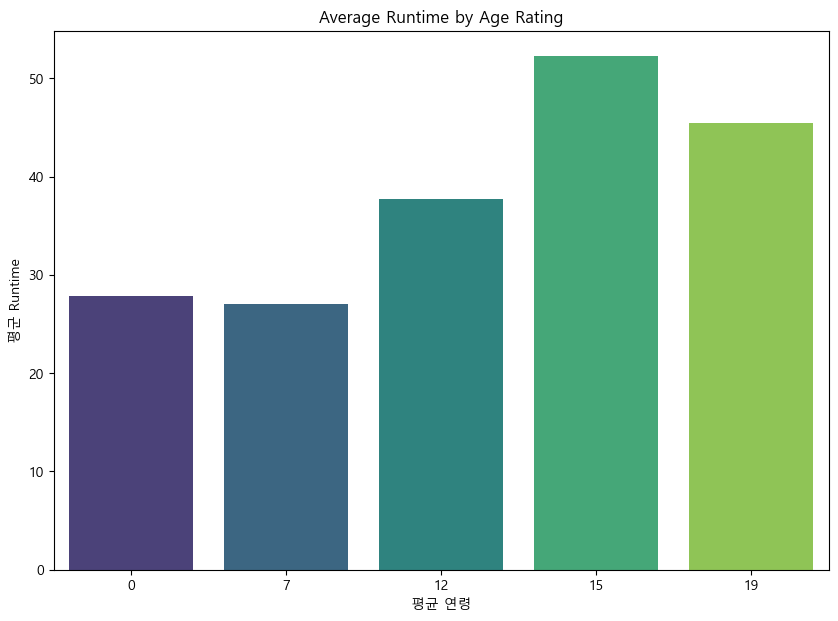

In [852]:
# runtime과 age_rating과 관련이 있지 않을까?

# 나이 등급 별 평균 런타임 계산
mean_runtime_by_age_rating = df.groupby('age_rating')['runtime'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 7))
barplot = sns.barplot(data=mean_runtime_by_age_rating, x='age_rating', y='runtime', palette='viridis')

plt.title('Average Runtime by Age Rating')
plt.xlabel('평균 연령')
plt.ylabel('평군 Runtime')
plt.show()

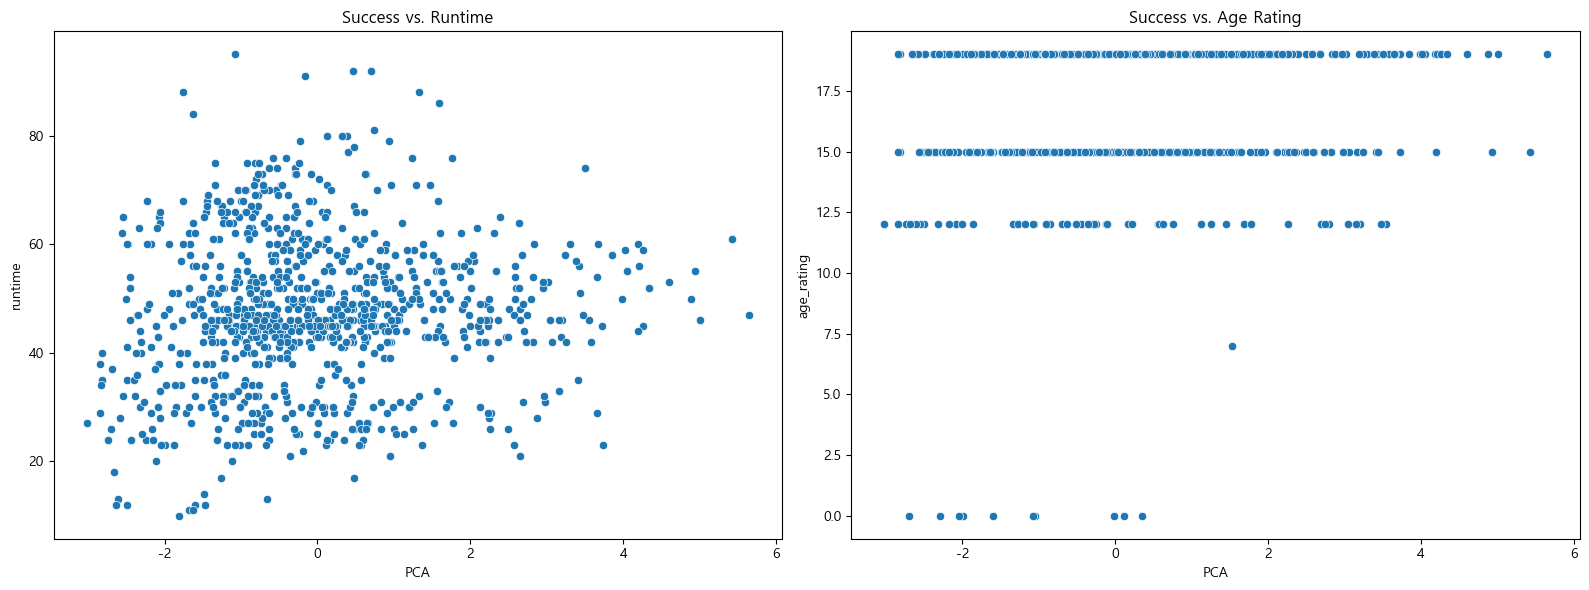

In [853]:
# subplot을 포함할 새로운 figure 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1행 2열의 subplot을 가로로 나열

# 각 subplot에 scatterplot 그리기
sns.scatterplot(x='PCA', y='runtime', data=df, ax=axes[0])
axes[0].set_title('Success vs. Runtime')

sns.scatterplot(x='PCA', y='age_rating', data=df, ax=axes[1])
axes[1].set_title('Success vs. Age Rating')

# subplot의 빈 공간 제거
fig.tight_layout()

# 그래프 출력
plt.show()

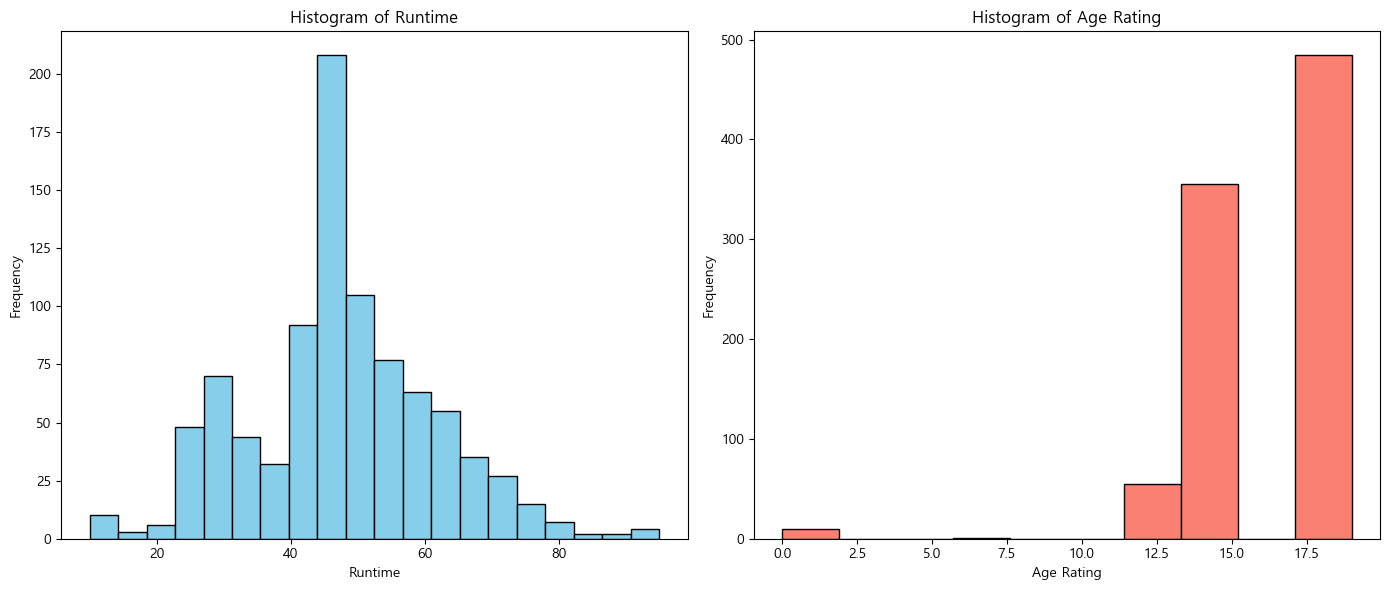

In [854]:
# figure와 axes 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열의 subplot을 가로로 나열

# 첫 번째 subplot: runtime에 대한 히스토그램
axes[0].hist(df['runtime'], bins=20, color='skyblue', edgecolor='black')  # bins는 막대 개수를 의미
axes[0].set_title('Histogram of Runtime')
axes[0].set_xlabel('Runtime')
axes[0].set_ylabel('Frequency')

# 두 번째 subplot: age_rating에 대한 히스토그램
axes[1].hist(df['age_rating'], bins=10, color='salmon', edgecolor='black')  # bins는 막대 개수를 의미
axes[1].set_title('Histogram of Age Rating')
axes[1].set_xlabel('Age Rating')
axes[1].set_ylabel('Frequency')

# subplot간의 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()


### genre_diversity_idx(장르다양성)에 따른 전반적인 흥행과의 관계

In [855]:
# 장르 다양성 지수 split으로 나눈 장르의 len
df['genre_diversity_idx'] = df['genre'].apply(lambda x: len(x.split(',')))

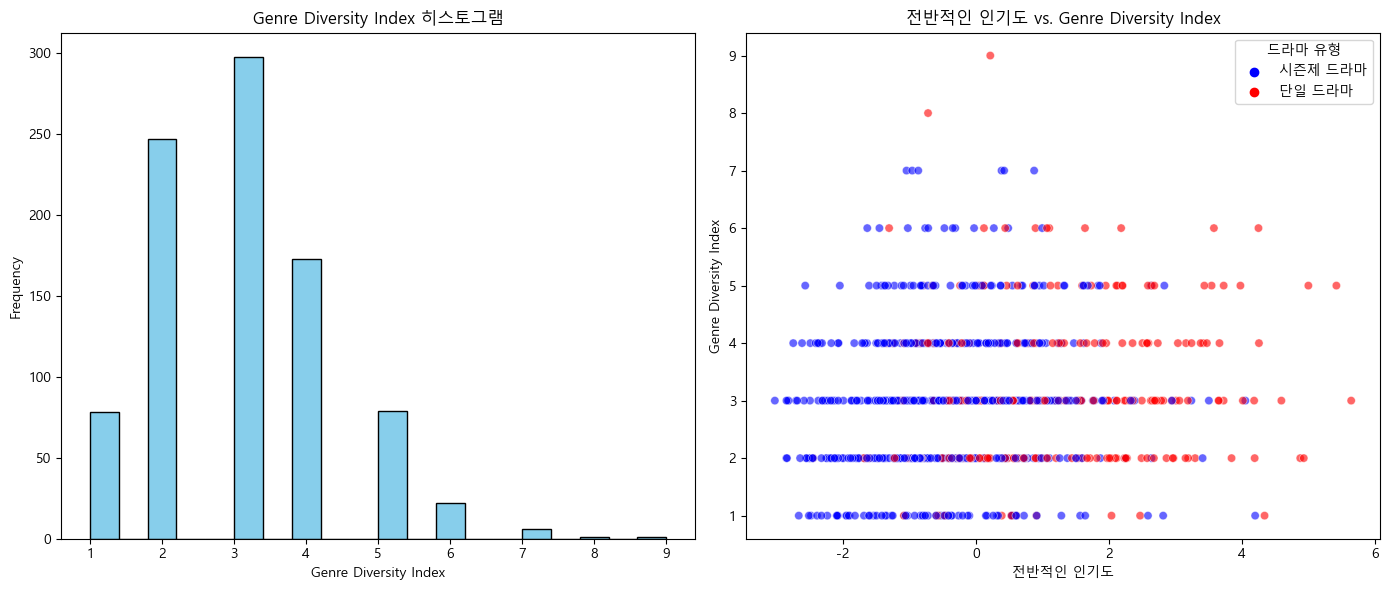

In [858]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (예시: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# figure와 axes 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열의 subplot을 가로로 나열

# 첫 번째 subplot: genre_diversity_idx에 대한 히스토그램
axes[0].hist(df['genre_diversity_idx'], bins=20, color='skyblue', edgecolor='black')  # bins는 막대 개수를 의미
axes[0].set_title('Genre Diversity Index 히스토그램')
axes[0].set_xlabel('Genre Diversity Index')
axes[0].set_ylabel('Frequency')

# 두 번째 subplot: PCA와 genre_diversity_idx의 scatter plot
sns.scatterplot(x='PCA', y='genre_diversity_idx', hue=(df['total_season_num'] >= 2), 
                data=df, ax=axes[1], palette={True: 'red', False: 'blue'}, alpha=0.6)
axes[1].set_title('전반적인 인기도 vs. Genre Diversity Index')
axes[1].set_xlabel('전반적인 인기도')
axes[1].set_ylabel('Genre Diversity Index')

# 범례 제목 설정
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['시즌제 드라마', '단일 드라마'], title='드라마 유형')

# subplot간의 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

- 장르의 다양성을 더 살펴보면 데이터의 양이 장르가 7개 이상인 드라마는 갯수가 작았기에 인기도가 낮은것으로 보이지만, 장르의 개수가 4-7인 드라마의 데이터 양이 작음에도 불구하고 인기도가 있는 것으로 보아 장르가 다양할수록 인기도와 상관이 있는 것으로 확인된다  

### genre와 Production Country에 따른 전반적인 흥행과의 분포

In [859]:
# 'genre' 컬럼에 대해서만 문자열로 변환
df['genre'] = df['genre'].astype(str)

# '드라마' 항목 제거
df['genre'] = df['genre'].apply(lambda x: ', '.join([genre for genre in x.split(', ') if genre != '드라마']))

# unnest genre 열: 리스트를 풀어서 각 장르를 별도의 행으로 만듦
df = df.explode('genre')

In [860]:
# production_country 컬럼의 데이터를 처리하는 함수 정의
def process_countries(countries):
    # 쉼표를 기준으로 분리하고 첫 번째 나라 선택
    countries_list = countries.split(',')
    first_country = countries_list[0].strip()
    return first_country

# apply 함수를 사용하여 모든 행에 적용
df['production_country'] = df['production_country'].apply(process_countries)

In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   korean_title         905 non-null    object 
 1   english_title        905 non-null    object 
 2   year                 905 non-null    int64  
 3   total_season_num     905 non-null    int64  
 4   runtime              905 non-null    int64  
 5   genre                905 non-null    object 
 6   age_rating           905 non-null    int32  
 7   production_country   905 non-null    object 
 8   total_count          905 non-null    float64
 9   total_rate           905 non-null    float64
 10  watchlist            905 non-null    float64
 11  popularity           905 non-null    int64  
 12  user_review          905 non-null    float64
 13  critic_review        905 non-null    float64
 14  production           821 non-null    object 
 15  distributor          897 non-null    object 


In [862]:
# genre 열의 각 항목을 쉼표로 분리하여 리스트로 변환
df['genre'] = df['genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])

# unnest genre 열: 리스트를 풀어서 각 장르를 별도의 행으로 만듦
df = df.explode('genre')

# 중복된 행 제거
df = df.drop_duplicates(subset=['english_title', 'production_country','runtime'])

# LabelEncoder를 사용하여 'production_country'와 'genre'을 레이블 인코딩
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['production_country'])

le_genre = LabelEncoder()
df['genre_encoded'] = le_genre.fit_transform(df['genre'])

In [863]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   korean_title         905 non-null    object 
 1   english_title        905 non-null    object 
 2   year                 905 non-null    int64  
 3   total_season_num     905 non-null    int64  
 4   runtime              905 non-null    int64  
 5   genre                905 non-null    object 
 6   age_rating           905 non-null    int32  
 7   production_country   905 non-null    object 
 8   total_count          905 non-null    float64
 9   total_rate           905 non-null    float64
 10  watchlist            905 non-null    float64
 11  popularity           905 non-null    int64  
 12  user_review          905 non-null    float64
 13  critic_review        905 non-null    float64
 14  production           821 non-null    object 
 15  distributor          897 non-null    object 


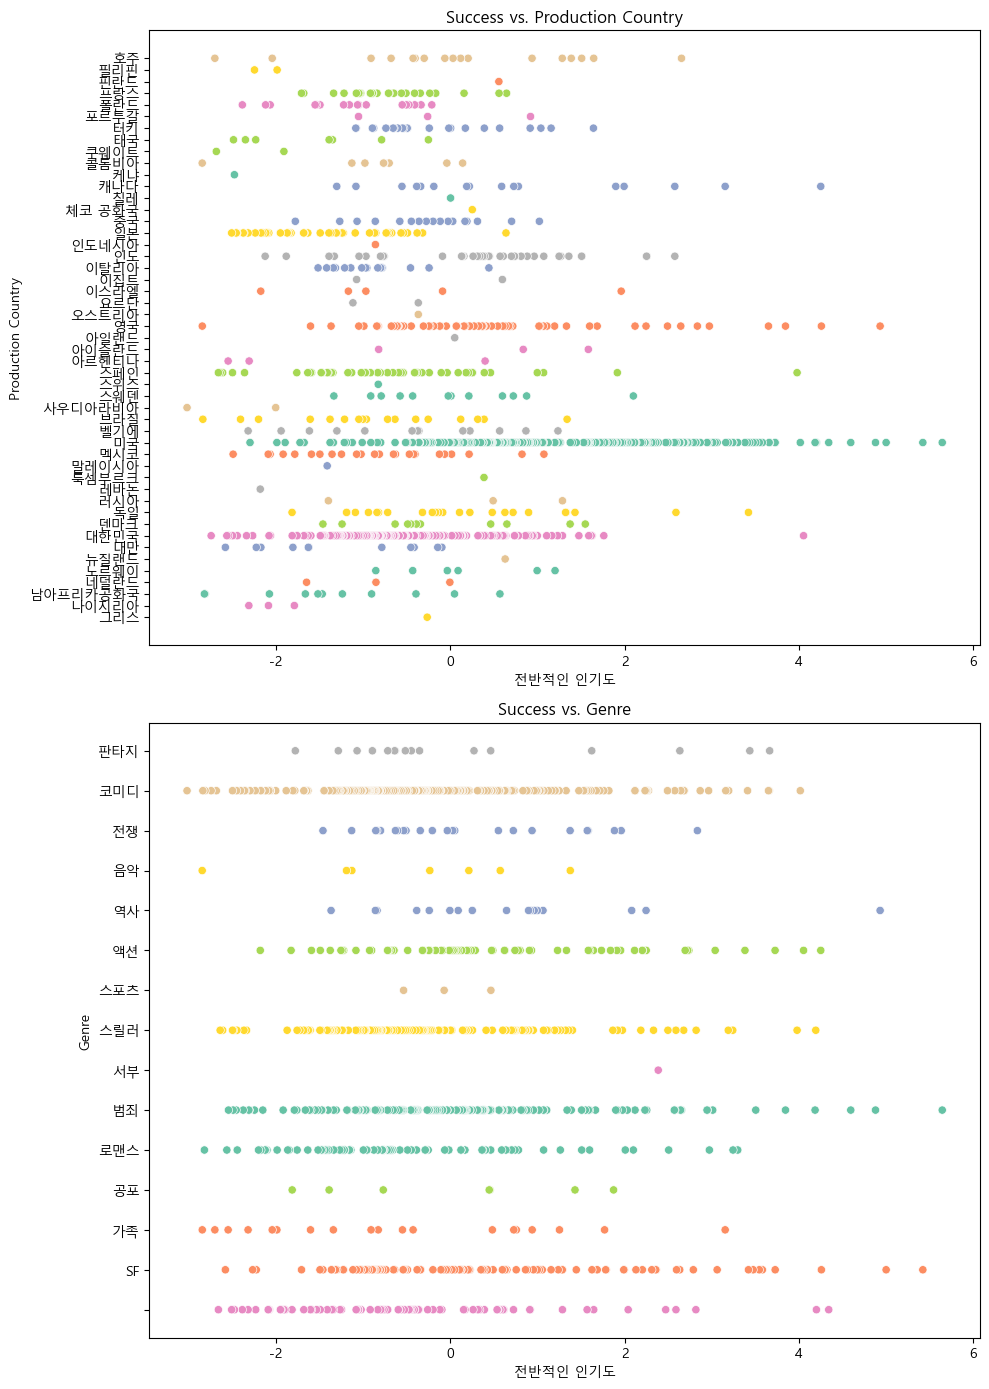

In [864]:
# PCA 값을 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='PCA', ascending=False)

# subplot을 포함할 새로운 figure 생성
fig, axes = plt.subplots(2, 1, figsize=(10, 14))  # 2행 1열의 subplot을 세로로 나열

# 각 subplot에 scatterplot 그리기
sns.scatterplot(x='PCA', y='country_encoded', data=df_sorted, ax=axes[0], hue='production_country', palette='Set2', legend=False)
axes[0].set_title('Success vs. Production Country')
axes[0].set_yticks(range(len(le_country.classes_)))
axes[0].set_yticklabels(le_country.classes_)
axes[0].set_xlabel('전반적인 인기도')
axes[0].set_ylabel('Production Country')

sns.scatterplot(x='PCA', y='genre_encoded', data=df_sorted, ax=axes[1], hue='genre', palette='Set2', legend=False)
axes[1].set_title('Success vs. Genre')
axes[1].set_yticks(range(len(le_genre.classes_)))
axes[1].set_yticklabels(le_genre.classes_)
axes[1].set_xlabel('전반적인 인기도')
axes[1].set_ylabel('Genre')

# subplot의 빈 공간 제거
fig.tight_layout()

# 그래프 출력
plt.show()

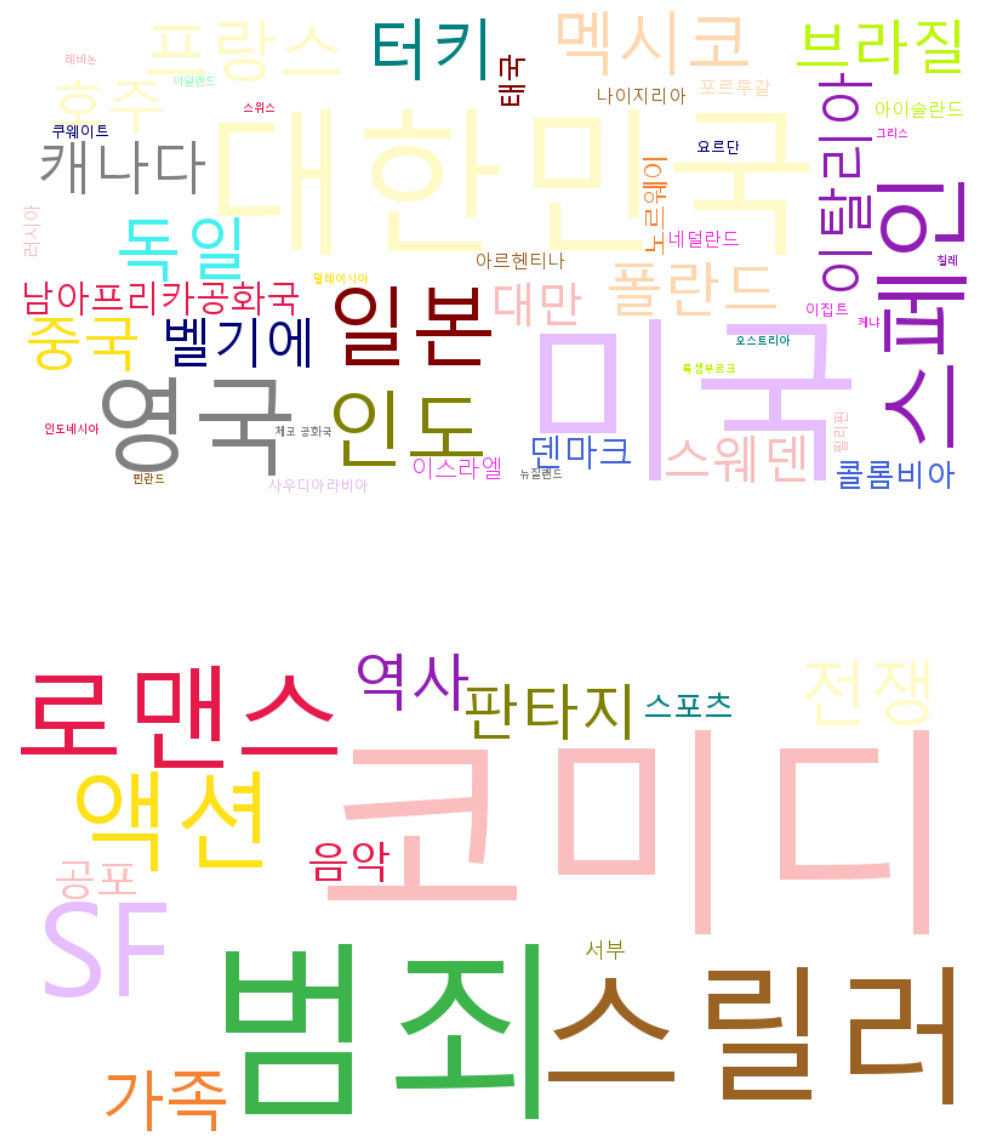

In [865]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 한글 폰트 경로 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 데이터프레임 정렬
df_sorted = df.sort_values(by='PCA', ascending=False)

# 생산 국가와 장르의 빈도 계산
country_counts = df_sorted['production_country'].value_counts()
genre_counts = df_sorted['genre'].value_counts()

# 색상 팔레트 지정
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

# 컬러 함수 생성
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return np.random.choice(colors)

# 워드클라우드 생성 함수
def create_wordcloud(data, title, ax, font_path):
    wordcloud = WordCloud(
        font_path=font_path, 
        width=800, 
        height=400, 
        background_color='white', 
        color_func=random_color_func
    ).generate_from_frequencies(data)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# subplot을 포함할 새로운 figure 생성
fig, axes = plt.subplots(2, 1, figsize=(10, 14))  # 2행 1열의 subplot을 세로로 나열

# 각 subplot에 워드클라우드 그리기
create_wordcloud(country_counts, '', axes[0], font_path)
create_wordcloud(genre_counts, '', axes[1], font_path)

# subplot의 빈 공간 제거
fig.tight_layout()

# 그래프 출력
plt.show()

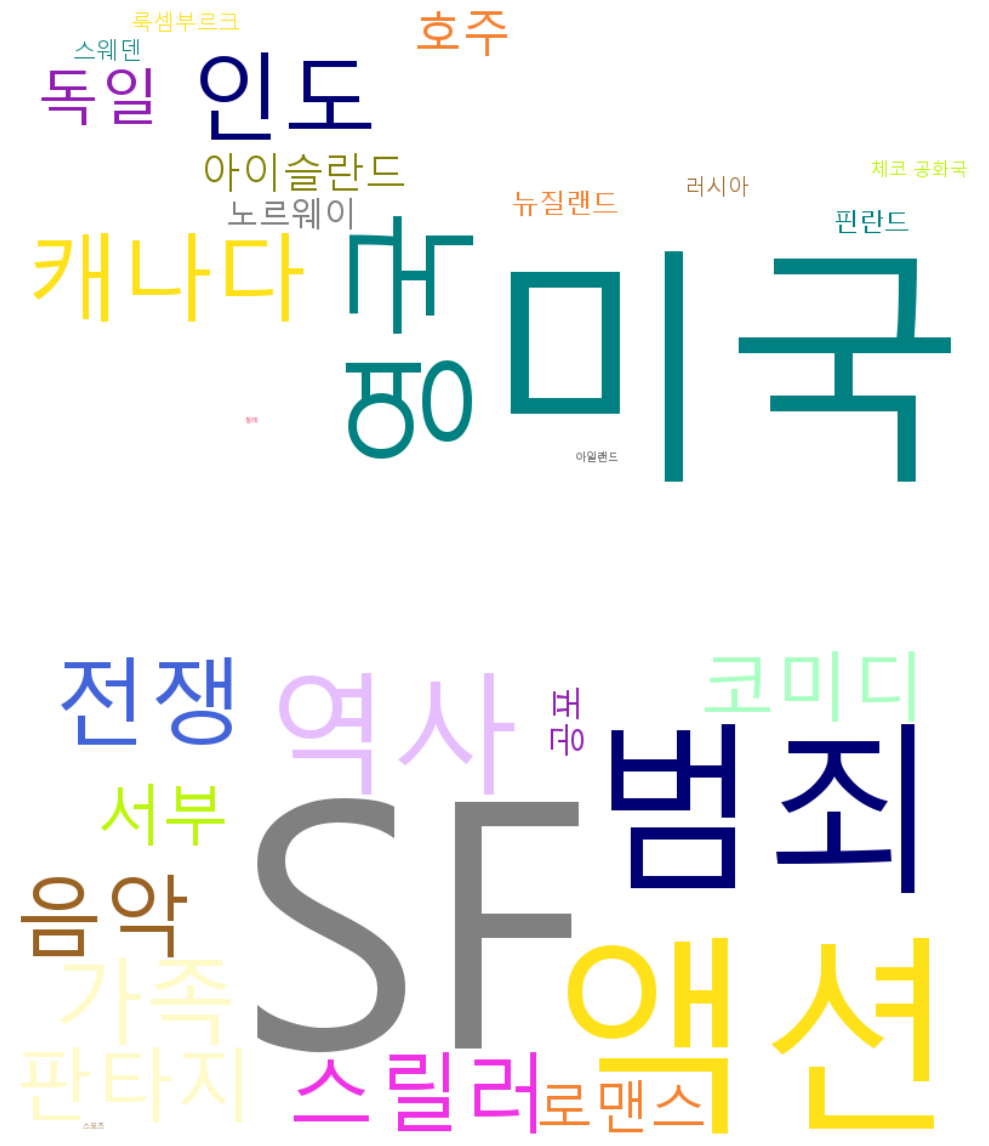

In [866]:
# 데이터프레임 정렬
df_sorted = df.sort_values(by='PCA', ascending=False)

# 생산 국가와 장르의 PCA 합 계산
country_pca_sum = df_sorted.groupby('production_country')['PCA'].sum()
genre_pca_sum = df_sorted.groupby('genre')['PCA'].sum()

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# 한글 폰트 경로 지정
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 색상 팔레트 지정
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

# 컬러 함수 생성
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return np.random.choice(colors)

# 워드클라우드 생성 함수
def create_wordcloud(data, title, ax, font_path):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', color_func=random_color_func).generate_from_frequencies(data)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# subplot을 포함할 새로운 figure 생성
fig, axes = plt.subplots(2, 1, figsize=(10, 14))  # 2행 1열의 subplot을 세로로 나열

# 각 subplot에 워드클라우드 그리기
create_wordcloud(country_pca_sum, '', axes[0], font_path)
create_wordcloud(genre_pca_sum, '', axes[1], font_path)

# subplot의 빈 공간 제거
fig.tight_layout()

# 그래프 출력
plt.show()


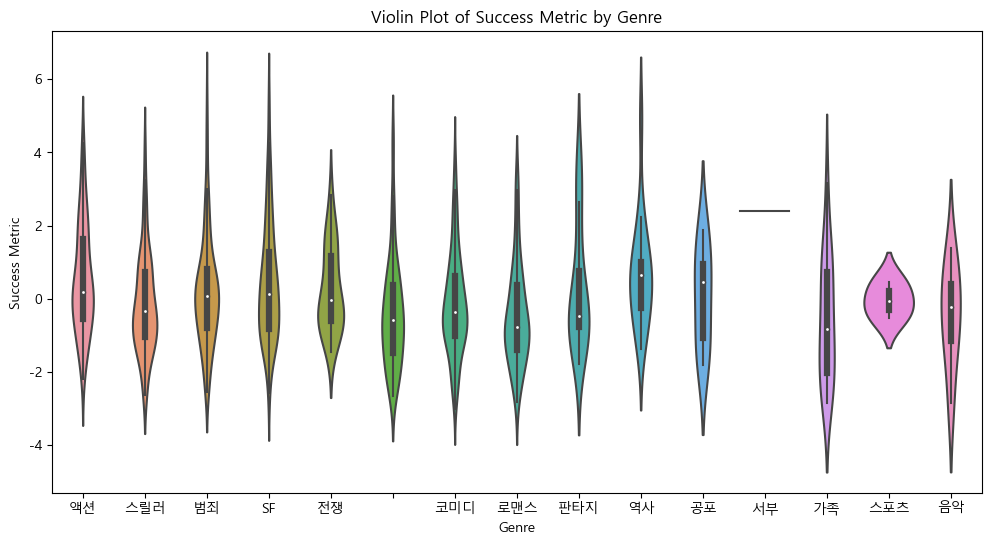

In [867]:
# Violin Plot: genre에 따른 success_metric의 분포
plt.figure(figsize=(12, 6))
sns.violinplot(x='genre', y='PCA', data=df)
plt.title('Violin Plot of Success Metric by Genre')
plt.xlabel('Genre')
plt.ylabel('Success Metric')
plt.show()

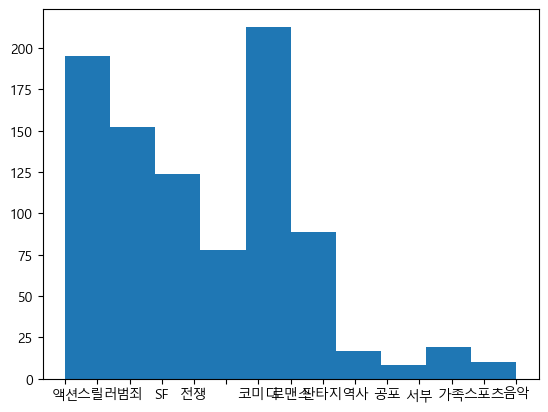

In [868]:
# total_rate 대한 histogram
plt.hist(df['genre'])
plt.show()

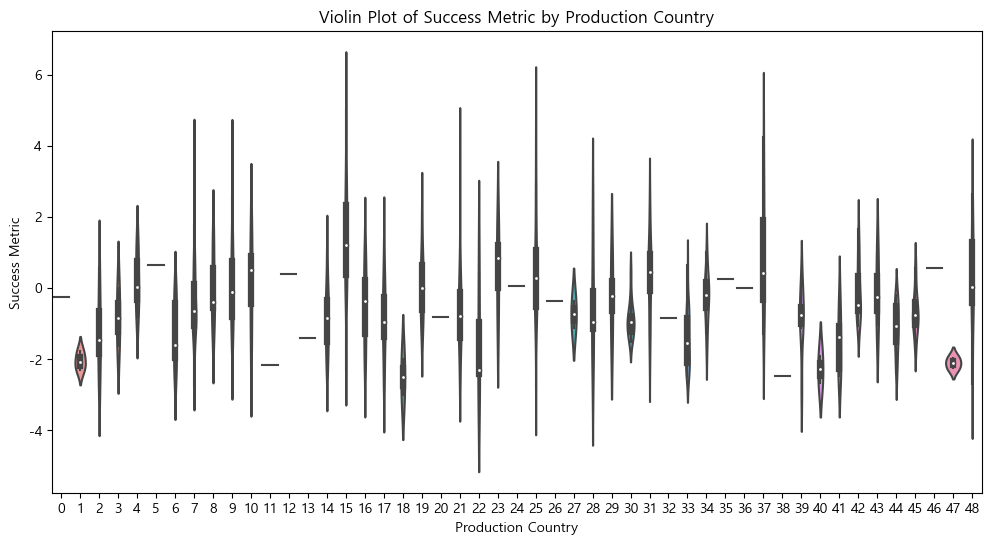

In [869]:
# Violin Plot: genre에 따른 success_metric의 분포
plt.figure(figsize=(12, 6))
sns.violinplot(x='country_encoded', y='PCA', data=df)
plt.title('Violin Plot of Success Metric by Production Country')
plt.xlabel('Production Country')
plt.ylabel('Success Metric')
plt.show()

- 7번 대한민국 9번 독일 15번 미국 21번 스페인 25번 영국 37번 캐나다

In [870]:
# 레이블 인코딩 후의 클래스 확인
print(le_country.classes_)

['그리스' '나이지리아' '남아프리카공화국' '네덜란드' '노르웨이' '뉴질랜드' '대만' '대한민국' '덴마크' '독일'
 '러시아' '레바논' '룩셈부르크' '말레이시아' '멕시코' '미국' '벨기에' '브라질' '사우디아라비아' '스웨덴' '스위스'
 '스페인' '아르헨티나' '아이슬란드' '아일랜드' '영국' '오스트리아' '요르단' '이스라엘' '이집트' '이탈리아' '인도'
 '인도네시아' '일본' '중국' '체코 공화국' '칠레' '캐나다' '케냐' '콜롬비아' '쿠웨이트' '태국' '터키' '포르투갈'
 '폴란드' '프랑스' '핀란드' '필리핀' '호주']


### 각 나라마다 선호하는 장르 찾기

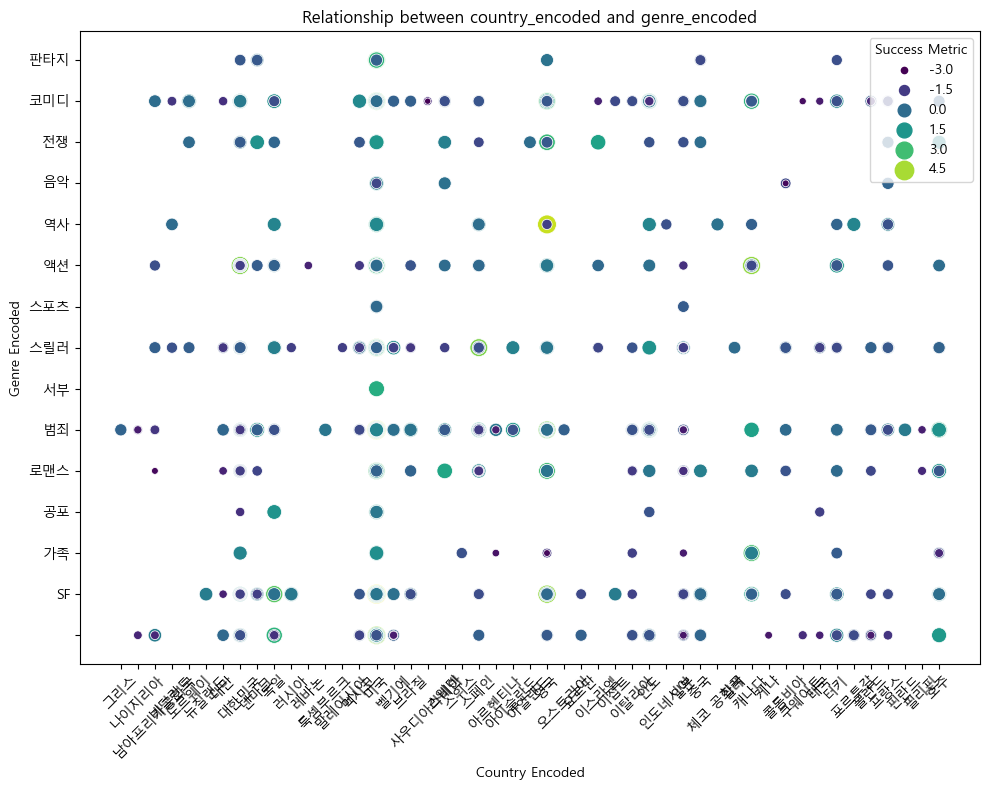

In [871]:
# LabelEncoder를 사용하여 'production_country'와 'genre'을 레이블 인코딩
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['production_country'])

le_genre = LabelEncoder()
df['genre_encoded'] = le_genre.fit_transform(df['genre'])

# country_encoded와 genre_encoded 사이의 관계를 scatterplot으로 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(x='country_encoded', y='genre_encoded', data=df, hue='PCA', palette='viridis', size='PCA', sizes=(20, 200))
plt.title('Relationship between country_encoded and genre_encoded')
plt.xlabel('Country Encoded')
plt.ylabel('Genre Encoded')
plt.legend(title='Success Metric', loc='upper right')
plt.xticks(range(len(le_country.classes_)), le_country.classes_, rotation=45)
plt.yticks(range(len(le_genre.classes_)), le_genre.classes_)
plt.tight_layout()
plt.show()

In [872]:
df['season_1'][0]

{'S1.E1': [8.2, 16000, 'Fri, Sep 17, 2021'],
 'S1.E2': [7.5, 14000, 'Fri, Sep 17, 2021'],
 'S1.E3': [8.0, 14000, 'Fri, Sep 17, 2021'],
 'S1.E4': [8.4, 14000, 'Fri, Sep 17, 2021'],
 'S1.E5': [7.6, 13000, 'Fri, Sep 17, 2021'],
 'S1.E6': [9.2, 23000, 'Fri, Sep 17, 2021'],
 'S1.E7': [7.9, 13000, 'Fri, Sep 17, 2021'],
 'S1.E8': [7.8, 13000, 'Fri, Sep 17, 2021'],
 'S1.E9': [7.5, 14000, 'Fri, Sep 17, 2021']}

## 군집화

In [873]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   korean_title         905 non-null    object 
 1   english_title        905 non-null    object 
 2   year                 905 non-null    int64  
 3   total_season_num     905 non-null    int64  
 4   runtime              905 non-null    int64  
 5   genre                905 non-null    object 
 6   age_rating           905 non-null    int32  
 7   production_country   905 non-null    object 
 8   total_count          905 non-null    float64
 9   total_rate           905 non-null    float64
 10  watchlist            905 non-null    float64
 11  popularity           905 non-null    int64  
 12  user_review          905 non-null    float64
 13  critic_review        905 non-null    float64
 14  production           821 non-null    object 
 15  distributor          897 non-null    object 


In [874]:
import category_encoders as ce

# TargetEncoder 객체 생성 및 fit_transform으로 변환 (count 사용)
target_encoder = ce.TargetEncoder(cols=['production_country'], handle_unknown='count')
df_im_encoded = target_encoder.fit_transform(df['production_country'], df.index)

# 인코딩된 값을 기존 데이터프레임에 추가
df['production_country_encoded'] = df_im_encoded

print(df[['production_country','production_country_encoded']])

           production_country  production_country_encoded
Unnamed: 0                                               
0                        대한민국                  417.181824
1                         벨기에                  443.500502
2                          대만                  509.258276
3                          미국                  299.276018
4                        대한민국                  417.181824
...                       ...                         ...
900                        인도                  659.064601
901                        일본                  513.131229
902                        인도                  659.064601
903                       레바논                  510.678922
904                       스페인                  530.323066

[905 rows x 2 columns]


In [875]:
cluster_df = df[['runtime','age_rating','genre_diversity_idx','genre_encoded','production_country_encoded','PCA']]

In [876]:
cluster_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   runtime                     905 non-null    int64  
 1   age_rating                  905 non-null    int32  
 2   genre_diversity_idx         905 non-null    int64  
 3   genre_encoded               905 non-null    int32  
 4   production_country_encoded  905 non-null    float64
 5   PCA                         905 non-null    float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 74.7 KB


In [877]:
cluster_df.head(3)

,runtime,age_rating,genre_diversity_idx,genre_encoded,production_country_encoded,PCA
Unnamed: 0,,,,,,
0,55,19,3,9,417.181824,4.052857
1,54,19,2,7,443.500502,0.868472
2,60,19,3,5,509.258276,-0.413941


In [878]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 군집수에 따른 실루엣계수를 담을 리스트
silhouette_scores = []

# 2~10까지 군집수를 변화시키며 실루엣계수를 계산
for n_clusters in range(2, 16):
    # KMeans 군집화 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=13)
    kmeans.fit(cluster_df)

    # 실루엣계수 계산
    silhouette_score_ = silhouette_score(cluster_df, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by set

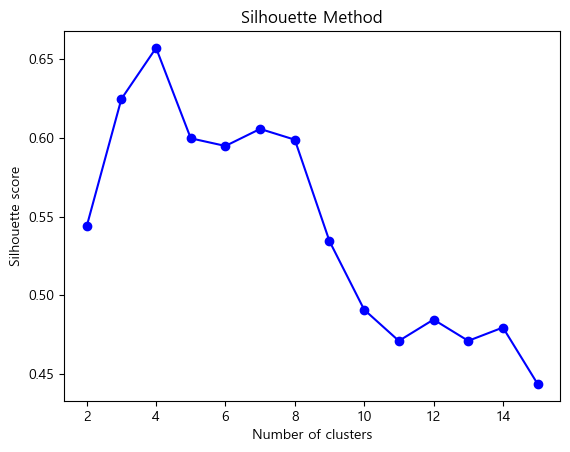

In [879]:
# 군집수에 따른 실루엣계수 그래프 그리기
plt.plot(range(2, 16), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

In [880]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

# KMeans 군집화
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_df)

# 군집 레이블을 기준으로 데이터프레임에 추가
cluster_df['cluster'] = cluster_labels

# 클러스터별로 데이터 분리
clusters = []
for i in range(4):
    clusters.append(cluster_df[cluster_df['cluster'] == i])

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\rbfl7\AppData\Local\Temp\ipykernel_10500\3979837980.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [881]:
import plotly.graph_objects as go

# Create a list of variable names
variable_names = ['runtime', 'age_rating', 'genre_diversity_idx', 'genre_encoded', 'production_country_encoded']

# Define colors for each cluster
colors = ['blue', 'red', 'green', 'orange']

# Loop through each variable and create a scatter plot for each cluster
for variable in variable_names:
    # Create an empty figure
    fig = go.Figure()

    # Loop through each cluster
    for i in range(4):  # 클러스터 개수에 맞게 수정 
        # Filter data for the current cluster
        cluster_data = cluster_df[cluster_df['cluster'] == i]

        # Add scatter trace for the current cluster and variable
        fig.add_trace(go.Scatter(
            x=cluster_data[variable],
            y=cluster_data['PCA'],
            mode='markers',
            marker=dict(color=colors[i]),
            name=f'Cluster {i}'
        ))

    # Set layout for the plot
    fig.update_layout(
        title=f"Scatter Plot of {variable} vs PCA",
        xaxis=dict(title=variable),
        yaxis=dict(title='PCA')
    )

    # Show plot
    fig.show()

- TargetEncoder한 제작국가에 의해 군집화가 됨

In [882]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   runtime                     905 non-null    int64  
 1   age_rating                  905 non-null    int32  
 2   genre_diversity_idx         905 non-null    int64  
 3   genre_encoded               905 non-null    int32  
 4   production_country_encoded  905 non-null    float64
 5   PCA                         905 non-null    float64
 6   cluster                     905 non-null    int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 78.2 KB
